
##### Objective: Analyze 12 months of sales data to:
- Identify sales patterns
- Optimize advertising timing
- Improve inventory management
- Maximize revenue opportunities


In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os,time,datetime

In [3]:
files = [file for file in os.listdir('Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('data.csv', index=False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv('data.csv')
all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
116134,172394,Google Phone,1,600,03/08/19 09:58,"809 Hill St, Seattle, WA 98101"
83041,228429,Lightning Charging Cable,2,14.95,07/06/19 14:13,"909 Johnson St, Los Angeles, CA 90001"
180899,253653,AAA Batteries (4-pack),2,2.99,09/21/19 23:33,"781 Lincoln St, Atlanta, GA 30301"
95556,213640,Flatscreen TV,1,300,06/20/19 08:10,"808 North St, Atlanta, GA 30301"
64528,159110,27in 4K Gaming Monitor,1,389.99,02/16/19 08:46,"714 Walnut St, New York City, NY 10001"
59238,154054,ThinkPad Laptop,1,999.99,02/16/19 21:04,"384 North St, Los Angeles, CA 90001"
152505,293497,AA Batteries (4-pack),1,3.84,11/30/19 09:01,"359 1st St, Los Angeles, CA 90001"
65310,159861,Apple Airpods Headphones,1,150,02/11/19 04:39,"768 Hickory St, Los Angeles, CA 90001"
14608,190489,Bose SoundSport Headphones,1,99.99,04/03/19 15:33,"865 Hill St, San Francisco, CA 94016"
115705,171990,27in FHD Monitor,1,149.99,03/16/19 20:33,"612 Dogwood St, San Francisco, CA 94016"


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Clean up the data


##### DROP NaN

In [5]:
#check NaNs
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna()

In [ ]:
#order date have some values that begin with Or, no idea why but we found it
all_data[all_data['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data[all_data['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
all_data['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

#### Augment data with additional columns
> Months 

> Sales

> City, State -> in one column



In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Month'] = all_data['Month'].astype('Int32')
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
176812,249731,AAA Batteries (4-pack),1,2.99,09/07/19 17:29,"448 Lincoln St, San Francisco, CA 94016",9
146334,287599,Apple Airpods Headphones,1,150,11/26/19 22:57,"147 9th St, Los Angeles, CA 90001",11
20149,238366,Apple Airpods Headphones,1,150,08/15/19 14:55,"282 Forest St, Seattle, WA 98101",8
181427,254153,iPhone,1,700,09/03/19 02:24,"586 Forest St, Austin, TX 73301",9
35875,300879,Lightning Charging Cable,1,14.95,12/15/19 21:43,"156 Jackson St, New York City, NY 10001",12


In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [12]:
all_data.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
237,176784,AAA Batteries (4-pack),1,2.99,04/08/19 10:14,"725 Madison St, Los Angeles, CA 90001",4,2.99
95433,213522,Lightning Charging Cable,1,14.95,06/27/19 10:34,"373 Cherry St, Boston, MA 02215",6,14.95
105836,162549,Macbook Pro Laptop,1,1700.00,03/26/19 08:09,"303 6th St, Portland, OR 97035",3,1700.00


In [ ]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1:3].str.join(',').str.strip()
#Removing zip code from state part
all_data['City'] = all_data['City'].str.split().str[:-1].str.join(' ')


#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())


all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [ ]:
all_data['Sales'].describe()

count    185950.000000
mean        185.490917
std         332.919771
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: Sales, dtype: float64

In [ ]:
#Correlation Analysis
correlation = all_data[['Sales', 'Quantity Ordered', 'Price Each']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                     Sales  Quantity Ordered  Price Each
Sales             1.000000         -0.139417    0.999203
Quantity Ordered -0.139417          1.000000   -0.148272
Price Each        0.999203         -0.148272    1.000000


> Best month for sales

Best month for sales was month 12 with $4,613,443.34


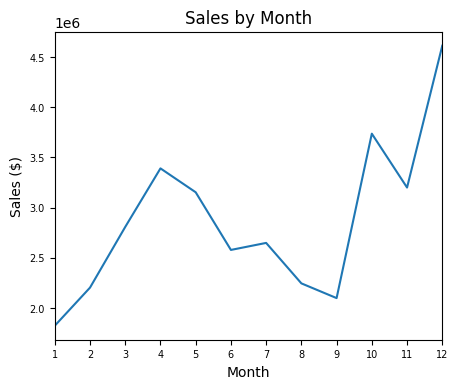

In [41]:
# Group by Month and calculate total sales
results = all_data.groupby('Month')['Sales'].sum()

# Find the best month
best_month = results.idxmax()
best_month_sales = results.max()

print(f"Best month for sales was month {best_month} with ${best_month_sales:,.2f}")

plt.figure(figsize=(5,4))
results.plot(kind='line',fontsize=7)  # Changed monthly_sales to results
plt.title('Sales by Month')
plt.xlabel('Month')
plt.xticks(range(13))
plt.xlim(1, 12)
plt.ylabel('Sales ($)')
plt.show()

City -> highist number of sales

In [15]:
all_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
61925,156617,Lightning Charging Cable,1,14.95,02/09/19 17:08,"639 Hickory St, Seattle, WA 98101",2,14.95,"Seattle, WA"
89157,234286,Apple Airpods Headphones,1,150.00,07/23/19 19:53,"567 4th St, Los Angeles, CA 90001",7,150.00,"Los Angeles, CA"
35217,300249,20in Monitor,1,109.99,12/17/19 11:27,"283 Lakeview St, Los Angeles, CA 90001",12,109.99,"Los Angeles, CA"
126846,200134,AAA Batteries (4-pack),2,2.99,05/13/19 18:24,"79 Ridge St, Boston, MA 02215",5,5.98,"Boston, MA"
124129,197551,USB-C Charging Cable,1,11.95,05/14/19 12:50,"465 Ridge St, Atlanta, GA 30301",5,11.95,"Atlanta, GA"


highest city for sales San Francisco, CA with $8,262,203.91


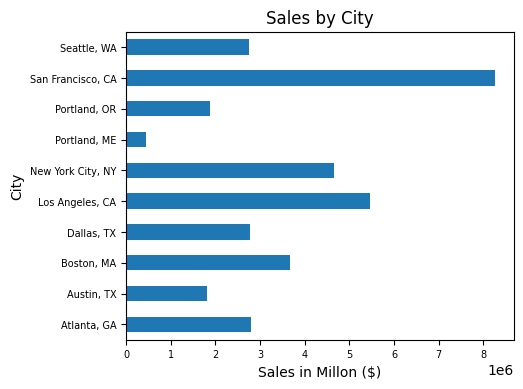

In [16]:
# Group by Month and calculate total sales
results = all_data.groupby('City')['Sales'].sum()

# Find the best month
best_city = results.idxmax()
best_city_sales = results.max()

print(f"highest city for sales {best_city} with ${best_city_sales:,.2f}")

plt.figure(figsize=(5,4))
results.plot(kind='barh',fontsize='7')
plt.title('Sales by City')
plt.xlabel('Sales in Millon ($)')
plt.show()

> **What time should we display advertisements to maximize likelihood of customer's buying product?**

In [17]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

   all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [18]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [19]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [20]:
hours = all_data.groupby('Hour')['Sales'].sum()
hours.sort_values(ascending=False).to_frame()

,Sales
Hour,
19,2412938.54
12,2316821.34
11,2300610.24
20,2281716.24
18,2219348.30
13,2155389.80
17,2129361.61
14,2083672.73
21,2042000.86


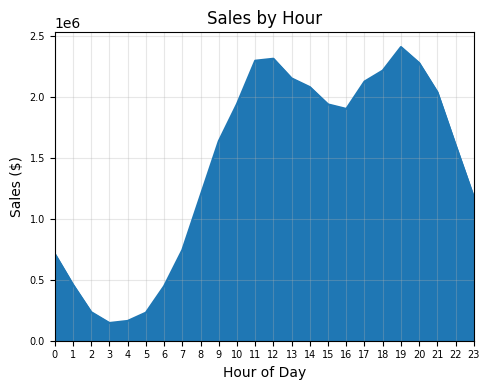

In [21]:
plt.figure(figsize=(5,4))
hours.plot(kind='area',fontsize=7)
plt.title('Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Sales ($)')
plt.xticks(range(24))
plt.xlim(0, 23)  #Set exact x-axis limits
plt.grid(alpha=0.3)
plt.tight_layout()

> What products are most often **SOLD TOGETHER?**

In [ ]:
#products with the same ID, they are sold together
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [23]:
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(5)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [24]:
from collections import Counter
from itertools import combinations

count = Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2))) # 2 for 2 pairs only, you can go beyond
    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


> **What product sold the most? why do you think it sold the most?** 

In [25]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [26]:
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()
print("Quantities Ordered by Product:")
quantity_ordered.sort_values(ascending=False)

Quantities Ordered by Product:


Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

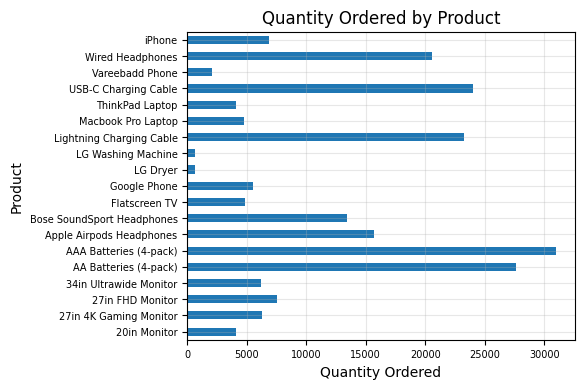

In [27]:
plt.figure(figsize=(5,4))
quantity_ordered.plot(kind='barh', fontsize=7)
plt.title('Quantity Ordered by Product')
plt.xlabel('Quantity Ordered')
plt.grid(alpha=0.3)
plt.show()

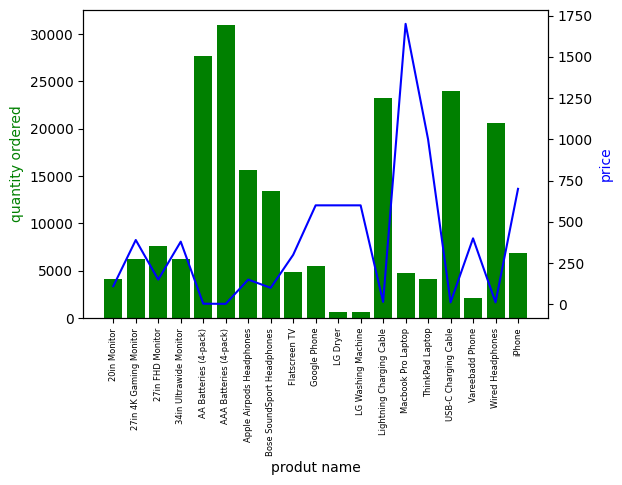

In [28]:
prices = all_data.groupby('Product')['Price Each'].mean()
products=prices.index



fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('produt name')
ax1.set_ylabel('quantity ordered', color='g')
ax2.set_ylabel('price', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=6)


plt.show()

It's clear that the ones wtih hightest quantity ordered correlate with low prices 